# **Importations** des données et modules

In [1]:
# Installation : pip install flake8 pycodestyle pycodestyle_magic
# Activate %%flake8 magic function
%load_ext pycodestyle_magic

In [2]:
# %%flake8  # checking PEP8 compliance
import pandas as pd
import functions.functions_p5 as functions_p5

In [3]:
# %%flake8  # checking PEP8 compliance
import os
from IPython.display import display

dir_name = 'data'
dict_df = {}

# Importing .csv files as pd.DataFrame
for file_name in os.listdir(dir_name):
    if file_name[-4:] == '.csv':
        file_path = os.path.join(dir_name, file_name)
        dict_df[file_name[:-4]] = pd.read_csv(file_path)

# Iterating upon DataFrames
for name, data_df in dict_df.items():
    
    # Displays name and head of each DataFrame
    print(name, "\n")
    display(data_df.head(2))

olist_customers_dataset 



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


olist_geolocation_dataset 



,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


olist_orders_dataset 



,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


olist_order_items_dataset 



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


olist_order_payments_dataset 



,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


olist_order_reviews_dataset 



,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


olist_products_dataset 



,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


olist_sellers_dataset 



,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


p5_data_PCA 



,Unnamed: 0,PCA_F1,PCA_F2,PCA_F3,PCA_F4,PCA_F5,PCA_F6,PCA_F7,PCA_F8,PCA_F9,...,PCA_F32,PCA_F33,PCA_F34,PCA_F35,PCA_F36,PCA_F37,PCA_F38,PCA_F39,PCA_F40,PCA_F41
0,0,0.017952,2.229837,-0.844122,1.147809,-1.994750,2.440063,-0.415379,-1.146327,-0.508315,...,-0.035779,0.070336,-0.014856,0.088199,-0.035167,-0.023841,0.035030,-0.014341,-0.314025,-0.302179
1,1,0.573789,2.805735,-1.607110,0.763434,-0.712848,0.871920,-2.296792,-1.558398,1.650893,...,-0.033760,-0.005781,-0.313685,0.041979,-0.040373,0.039682,0.427158,-0.446084,0.245614,0.260420


p5_data_RFM 



,Unnamed: 0,Recency,Frequency,Monetary
0,0,-1.511924,-0.199981,-0.081436
1,1,0.062313,-0.199981,0.602275


p5_data_std 



,Unnamed: 0,nb_distinct_products,nb_orders,sum_payments,mean_payment_installments,mean_review_score,count_review_comments,mean_product_weight_g,last_order_purchase_timestamp,mean_distance_seller_km,...,state_PR,state_RJ,state_RN,state_RO,state_RR,state_RS,state_SC,state_SE,state_SP,state_TO
0,0,-0.238397,-0.199981,-0.115552,-0.341734,-0.052462,-0.296503,1.778032,-1.511924,-0.423915,...,-0.231182,-0.38526,-0.070008,-0.050505,-0.021513,-0.241173,-0.194841,-0.059432,1.175606,-0.053138
1,1,-0.238397,-0.199981,0.162119,1.897287,0.689677,-0.296503,2.174444,0.062313,-0.314055,...,-0.231182,-0.38526,-0.070008,-0.050505,-0.021513,-0.241173,-0.194841,-0.059432,1.175606,-0.053138


product_category_name_translation 



,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


## Inspection de l'intégrité des données (valeurs dupliquées)

In [4]:
def contains_duplicates(dataframe):
    """This function checks the presence of duplicates rows in a dataframe."""
    
    mask = dataframe.duplicated(keep='first')
    nb_duplicates = len(dataframe[mask])
    
    if nb_duplicates == 0:
        return False
    
    else:
        return True

In [5]:
# Iterating upon DataFrames
for name, data_df in dict_df.items():
    
    # If there are duplicates data
    if contains_duplicates(data_df):
        print("------------------")
        print(name, "\n")
        
        mask = data_df.duplicated(keep='first')
        nb_duplicates = len(data_df[mask])
        
        # Displays the number of duplicates
        print("DataFrame contains {} duplicates.".format(nb_duplicates))

------------------
olist_geolocation_dataset 

DataFrame contains 261831 duplicates.


La table 'olist_geolocation_dataset' contient des valeurs dupliquées, mais nous ne supprimons pas encore les valeurs dupliquées. En effet, nous calculerons le barycentre des positions géographiques (latitude, longitude) associées à un même code postal. Or, les valeurs dupliquées sont une information utile dans le calcul de ces barycentres.

## Inspection de l'intégrité des données (valeurs manquantes)

In [6]:
# Iterating upon DataFrames
for name, data_df in dict_df.items():
    nb_rows = len(data_df)
    nb_cols = len(data_df.columns)
    nb_data = data_df.count().sum()
    
    # If there are missing data
    if nb_data != nb_cols * nb_rows:
        print("------------------")
        print(name, "\n")
        
        # Displays the global filling rate of the DataFrame
        functions_p5.global_filling_rate(data_df)

------------------
olist_orders_dataset 

DataFrame has 99441 rows and 8 columns.

Global filling rate of the DataFrame: 99.38%
Missing values in the DataFrame: 4908 (0.62%)

Number of rows with missing values: 2980 (3.00%)
Number of columns with missing values: 3 (37.50%)
------------------
olist_order_reviews_dataset 

DataFrame has 100000 rows and 7 columns.

Global filling rate of the DataFrame: 79.07%
Missing values in the DataFrame: 146532 (20.93%)

Number of rows with missing values: 90014 (90.01%)
Number of columns with missing values: 2 (28.57%)
------------------
olist_products_dataset 

DataFrame has 32951 rows and 9 columns.

Global filling rate of the DataFrame: 99.17%
Missing values in the DataFrame: 2448 (0.83%)

Number of rows with missing values: 611 (1.85%)
Number of columns with missing values: 8 (88.89%)


### Table des commandes

In [7]:
# Inspection of the columns with missing data
data = dict_df['olist_orders_dataset']
display(functions_p5.columns_filling_rate(data, columns='all', missing_only=True))

# Identification of rows with missing or null values 
mask = data.isnull().any(axis=1) # pd.Series of boolean
df_masked = data[mask]

df_masked.head()

,nb_values,missing_values,filling_rate
order_delivered_customer_date,96476.0,2965.0,0.970183
order_delivered_carrier_date,97658.0,1783.0,0.982070
order_approved_at,99281.0,160.0,0.998391


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00


Manifestement les données manquantes de la table des commande ('olist_orders_dataset') correspondent aux commandes non-livrées. Pour éviter les problèmes ultérieurs, nous allons faire de l'imputation pour ces commandes.

### Table des évaluations

In [8]:
# Inspection of the columns with missing data
data = dict_df['olist_order_reviews_dataset']
display(functions_p5.columns_filling_rate(data, columns='all', missing_only=True))

# Identification of rows with missing or null values 
mask = data.isnull().any(axis=1) # pd.Series of boolean
df_masked = data[mask]

df_masked.head()

,nb_values,missing_values,filling_rate
review_comment_title,11715.0,88285.0,0.11715
review_comment_message,41753.0,58247.0,0.41753


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Manifestement, les données manquantes dans la table des évaluations ('olist_order_reviews_dataset') correspondent aux cas où les clients n'ont pas laissé d'évaluation. Nous traitons cela dans l'immédiat en remplaçant les valeurs manquantes par une chaîne de caractères vide, et plus tard en convertissant les deux variables concernées en variables booléenne.

In [9]:
# Filling the missing values for comment title and comment message by ''
dict_df['olist_order_reviews_dataset'][
    ['review_comment_title', 'review_comment_message']
] = dict_df['olist_order_reviews_dataset'][
    ['review_comment_title', 'review_comment_message']
].fillna(value='')

In [10]:
# Checking the results of imputation
functions_p5.global_filling_rate(dict_df['olist_order_reviews_dataset'])

DataFrame has 100000 rows and 7 columns.

Global filling rate of the DataFrame: 100.00%
Missing values in the DataFrame: 0 (0.00%)

Number of rows with missing values: 0 (0.00%)
Number of columns with missing values: 0 (0.00%)


### Table des produits

In [11]:
# Inspection of the columns with missing data
data = dict_df['olist_products_dataset']
display(functions_p5.columns_filling_rate(data, columns='all', missing_only=True))

# Identification of rows with missing or null values 
mask = data.isnull().any(axis=1) # pd.Series of boolean
df_masked = data[mask]

df_masked.head()

,nb_values,missing_values,filling_rate
product_category_name,32341.0,610.0,0.981488
product_name_lenght,32341.0,610.0,0.981488
product_description_lenght,32341.0,610.0,0.981488
product_photos_qty,32341.0,610.0,0.981488
product_weight_g,32949.0,2.0,0.999939
product_length_cm,32949.0,2.0,0.999939
product_height_cm,32949.0,2.0,0.999939
product_width_cm,32949.0,2.0,0.999939


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


Pour quelques produits (610), il manque toutes les informations de descriptif du produit. Et pour d'autres (2), il manque le poids et les dimensions du produit. Nous allons procéder à une imputation simple pour ces données manquantes.

In [12]:
# Convert 'product_category_name' to categorical
dict_df['olist_products_dataset']['product_category_name'] = dict_df['olist_products_dataset']['product_category_name'].astype('category')

# Proceed to column-wise imputations (based on dtypes)
dict_df['olist_products_dataset'] = functions_p5.smart_imputation(dict_df['olist_products_dataset'])

# Checking the results of imputation
functions_p5.global_filling_rate(dict_df['olist_products_dataset'])

DataFrame has 32951 rows and 9 columns.

Global filling rate of the DataFrame: 100.00%
Missing values in the DataFrame: 0 (0.00%)

Number of rows with missing values: 0 (0.00%)
Number of columns with missing values: 0 (0.00%)


# **Jointures des tables**
Les données sont présentées dans une base de données relationnelle sous forme 'normale'. Nous nous intéressons à la segmentation des clients. Nous allons donc faire les jointures de données nécessaires sur les clients pour avoir toutes les données dans une table unique.

## Jointure des tables 'customers_dataset' et 'orders_dataset'
Pour associer les cilents aux commandes. Nous faisons une jointure extérieure "gauche" pour conserver les données des clients qui ne sont pas associés à une commande.

In [13]:
# %%flake8  # checking PEP8 compliance

# Dataframes to join
df1 = dict_df['olist_customers_dataset']
df2 = dict_df['olist_orders_dataset']

# Joining dataframe, specifying the column to merge on
data = pd.merge(df1, df2, on='customer_id', how="left")  # left join

In [14]:
df1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [15]:
def joining_check(left_df, right_df, left_key, right_key):
    '''This function checks the keys before a joining of DataFrames.'''

    # Checking the shape before joining
    left_set = set(left_df[left_key].unique())
    right_set = set(right_df[right_key].unique())

    # Display some results
    nb_shared_keys = len(left_set & right_set)  # set intersection
    print("Number of shared values of keys between left_df and right_df: {}".format(nb_shared_keys))

    nb_left_specific_keys = len(left_set - right_set)  # sets difference
    print("Number of specifique values of key '{}' for left_df: {}".format(left_key, nb_left_specific_keys))

    nb_right_specific_keys = len(right_set - left_set)  # sets difference
    print("Number of specifique values of key '{}' for right_df: {}".format(left_key, nb_right_specific_keys))

    # Number of rows in left_df with one of the specific values of key
    mask =  (left_df[left_key].isin(left_set - right_set))
    nb_left_rows_w_specific_keys = len(left_df[mask])
    print("Number of rows in left_df with a specific value of key: {}".format(nb_left_rows_w_specific_keys))
    
    # Print a few rows to illustrate the case of specific values on left
    if nb_left_rows_w_specific_keys > 0:
        display(left_df[mask].head())

In [16]:
# Setting up the variables
left_df = df1
right_df = df2
left_key = 'customer_id'
right_key = 'customer_id'

# Checking shapes
joining_check(left_df, right_df, left_key, right_key=left_key)

# Checking the filling rates
functions_p5.global_filling_rate(df1)
functions_p5.global_filling_rate(df2)
functions_p5.global_filling_rate(data)

Number of shared values of keys between left_df and right_df: 99441
Number of specifique values of key 'customer_id' for left_df: 0
Number of specifique values of key 'customer_id' for right_df: 0
Number of rows in left_df with a specific value of key: 0
DataFrame has 99441 rows and 5 columns.

Global filling rate of the DataFrame: 100.00%
Missing values in the DataFrame: 0 (0.00%)

Number of rows with missing values: 0 (0.00%)
Number of columns with missing values: 0 (0.00%)
DataFrame has 99441 rows and 8 columns.

Global filling rate of the DataFrame: 99.38%
Missing values in the DataFrame: 4908 (0.62%)

Number of rows with missing values: 2980 (3.00%)
Number of columns with missing values: 3 (37.50%)
DataFrame has 99441 rows and 12 columns.

Global filling rate of the DataFrame: 99.59%
Missing values in the DataFrame: 4908 (0.41%)

Number of rows with missing values: 2980 (3.00%)
Number of columns with missing values: 3 (25.00%)


Les valeurs manquantes proviennent des commandes non livrées.

## Jointure avec la table 'order_payments_dataset'

In [17]:
# %%flake8  # checking PEP8 compliance

# Dataframe to join
df1 = data
df2 = dict_df['olist_order_payments_dataset']

# Joining dataframe, specifying the column to merge on
data = pd.merge(df1, df2, on='order_id', how="left")  # inner join

In [18]:
# Setting up the variables
left_df = df1
right_df = df2
left_key = 'order_id'
right_key = 'order_id'

# Checking shapes
joining_check(left_df, right_df, left_key, right_key=left_key)

# Checking the results of joining
functions_p5.global_filling_rate(df1)
functions_p5.global_filling_rate(df2)
functions_p5.global_filling_rate(data)

Number of shared values of keys between left_df and right_df: 99440
Number of specifique values of key 'order_id' for left_df: 1
Number of specifique values of key 'order_id' for right_df: 0
Number of rows in left_df with a specific value of key: 1


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
21125,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00


DataFrame has 99441 rows and 12 columns.

Global filling rate of the DataFrame: 99.59%
Missing values in the DataFrame: 4908 (0.41%)

Number of rows with missing values: 2980 (3.00%)
Number of columns with missing values: 3 (25.00%)
DataFrame has 103886 rows and 5 columns.

Global filling rate of the DataFrame: 100.00%
Missing values in the DataFrame: 0 (0.00%)

Number of rows with missing values: 0 (0.00%)
Number of columns with missing values: 0 (0.00%)
DataFrame has 103887 rows and 16 columns.

Global filling rate of the DataFrame: 99.69%
Missing values in the DataFrame: 5199 (0.31%)

Number of rows with missing values: 3148 (3.03%)
Number of columns with missing values: 7 (43.75%)


Une commande ne correspond à aucune entrée dans la table des paiements.

## Jointure avec la table 'order_reviews_dataset'

In [19]:
# %%flake8  # checking PEP8 compliance

# Dataframe to join
df1 = data
df2 = dict_df['olist_order_reviews_dataset']

# Joining dataframe, specifying the column to merge on
data = pd.merge(df1, df2, on='order_id', how="left")  # left join

In [20]:
# Checking the shape before joining
set_left = set(df1['order_id'].unique())
set_right = set(df2['order_id'].unique())
print(set_left - set_right)

# Checking the results of joining
functions_p5.global_filling_rate(df1)
functions_p5.global_filling_rate(df2)
functions_p5.global_filling_rate(data)

set()
DataFrame has 103887 rows and 16 columns.

Global filling rate of the DataFrame: 99.69%
Missing values in the DataFrame: 5199 (0.31%)

Number of rows with missing values: 3148 (3.03%)
Number of columns with missing values: 7 (43.75%)
DataFrame has 100000 rows and 7 columns.

Global filling rate of the DataFrame: 100.00%
Missing values in the DataFrame: 0 (0.00%)

Number of rows with missing values: 0 (0.00%)
Number of columns with missing values: 0 (0.00%)
DataFrame has 104486 rows and 22 columns.

Global filling rate of the DataFrame: 99.77%
Missing values in the DataFrame: 5232 (0.23%)

Number of rows with missing values: 3170 (3.03%)
Number of columns with missing values: 7 (31.82%)


In [21]:
data.head(4).T

,0,1,2,3
customer_id,06b8999e2fba1a1fbc88172c00ba8bc7,18955e83d337fd6b2def6b18a428ac77,4e7b3e00288586ebd08712fdd0374a03,b2b6027bc5c5109e529d4dc6358b12c3
customer_unique_id,861eff4711a542e4b93843c6dd7febb0,290c77bc529b7ac935b93aa66c333dc3,060e732b5b29e8181a18229c7b0b2b5e,259dac757896d24d7702b9acbbff3f3c
customer_zip_code_prefix,14409,9790,1151,8775
customer_city,franca,sao bernardo do campo,sao paulo,mogi das cruzes
customer_state,SP,SP,SP,SP
order_id,00e7ee1b050b8499577073aeb2a297a1,29150127e6685892b6eab3eec79f59c7,b2059ed67ce144a36e2aa97d2c9e9ad2,951670f92359f4fe4a63112aa7306eba
order_status,delivered,delivered,delivered,delivered
order_purchase_timestamp,2017-05-16 15:05:35,2018-01-12 20:48:24,2018-05-19 16:07:45,2018-03-13 16:06:38
order_approved_at,2017-05-16 15:22:12,2018-01-12 20:58:32,2018-05-20 16:19:10,2018-03-13 17:29:19
order_delivered_carrier_date,2017-05-23 10:47:57,2018-01-15 17:14:59,2018-06-11 14:31:00,2018-03-27 23:22:42


## Jointure avec la table 'order_item_dataset'

In [22]:
# %%flake8  # checking PEP8 compliance

# Dataframe to join
df1 = data
df2 = dict_df['olist_order_items_dataset']

# Joining dataframe, specifying the column to merge on
data = pd.merge(df1, df2, on='order_id', how="left")  # left join

In [23]:
# Checking the shape before joining
set_left = set(df1['order_id'].unique())
set_right = set(df2['order_id'].unique())
print(len(set_left - set_right))

# Checking the results of joining
functions_p5.global_filling_rate(df1)
functions_p5.global_filling_rate(df2)
functions_p5.global_filling_rate(data)

775
DataFrame has 104486 rows and 22 columns.

Global filling rate of the DataFrame: 99.77%
Missing values in the DataFrame: 5232 (0.23%)

Number of rows with missing values: 3170 (3.03%)
Number of columns with missing values: 7 (31.82%)
DataFrame has 112650 rows and 7 columns.

Global filling rate of the DataFrame: 100.00%
Missing values in the DataFrame: 0 (0.00%)

Number of rows with missing values: 0 (0.00%)
Number of columns with missing values: 0 (0.00%)
DataFrame has 119151 rows and 28 columns.

Global filling rate of the DataFrame: 99.68%
Missing values in the DataFrame: 10694 (0.32%)

Number of rows with missing values: 3440 (2.89%)
Number of columns with missing values: 13 (46.43%)


In [24]:
data.head(4).T

,0,1,2,3
customer_id,06b8999e2fba1a1fbc88172c00ba8bc7,18955e83d337fd6b2def6b18a428ac77,4e7b3e00288586ebd08712fdd0374a03,b2b6027bc5c5109e529d4dc6358b12c3
customer_unique_id,861eff4711a542e4b93843c6dd7febb0,290c77bc529b7ac935b93aa66c333dc3,060e732b5b29e8181a18229c7b0b2b5e,259dac757896d24d7702b9acbbff3f3c
customer_zip_code_prefix,14409,9790,1151,8775
customer_city,franca,sao bernardo do campo,sao paulo,mogi das cruzes
customer_state,SP,SP,SP,SP
order_id,00e7ee1b050b8499577073aeb2a297a1,29150127e6685892b6eab3eec79f59c7,b2059ed67ce144a36e2aa97d2c9e9ad2,951670f92359f4fe4a63112aa7306eba
order_status,delivered,delivered,delivered,delivered
order_purchase_timestamp,2017-05-16 15:05:35,2018-01-12 20:48:24,2018-05-19 16:07:45,2018-03-13 16:06:38
order_approved_at,2017-05-16 15:22:12,2018-01-12 20:58:32,2018-05-20 16:19:10,2018-03-13 17:29:19
order_delivered_carrier_date,2017-05-23 10:47:57,2018-01-15 17:14:59,2018-06-11 14:31:00,2018-03-27 23:22:42


## Jointure avec la table 'products_dataset'

In [25]:
# %%flake8  # checking PEP8 compliance

# Dataframe to join
df1 = data
df2 = dict_df['olist_products_dataset']

# Joining dataframe, specifying the column to merge on
data = pd.merge(df1, df2, on='product_id', how="left")  # left join

In [26]:
# Checking the shape before joining
set_left = set(df1['product_id'].unique())
set_right = set(df2['product_id'].unique())
print(len(set_left - set_right))

# Checking the results of joining
functions_p5.global_filling_rate(df1)
functions_p5.global_filling_rate(df2)
functions_p5.global_filling_rate(data)

1
DataFrame has 119151 rows and 28 columns.

Global filling rate of the DataFrame: 99.68%
Missing values in the DataFrame: 10694 (0.32%)

Number of rows with missing values: 3440 (2.89%)
Number of columns with missing values: 13 (46.43%)
DataFrame has 32951 rows and 9 columns.

Global filling rate of the DataFrame: 100.00%
Missing values in the DataFrame: 0 (0.00%)

Number of rows with missing values: 0 (0.00%)
Number of columns with missing values: 0 (0.00%)
DataFrame has 119151 rows and 36 columns.

Global filling rate of the DataFrame: 99.60%
Missing values in the DataFrame: 17358 (0.40%)

Number of rows with missing values: 3440 (2.89%)
Number of columns with missing values: 21 (58.33%)


## Jointure avec la table 'translation_dataset'

In [27]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


In [28]:
# %%flake8  # checking PEP8 compliance

# Dataframe to join
df1 = data
df2 = dict_df['product_category_name_translation']

# Joining dataframe, specifying the column to merge on
data = pd.merge(df1, df2, on='product_category_name', how="left")  # left join

In [29]:
# Checking the shape before joining
set_left = set(df1['product_category_name'].unique())
set_right = set(df2['product_category_name'].unique())
print(len(set_left - set_right))

# Checking the results of joining
functions_p5.global_filling_rate(df1)
functions_p5.global_filling_rate(df2)
functions_p5.global_filling_rate(data)

4
DataFrame has 119151 rows and 36 columns.

Global filling rate of the DataFrame: 99.60%
Missing values in the DataFrame: 17358 (0.40%)

Number of rows with missing values: 3440 (2.89%)
Number of columns with missing values: 21 (58.33%)
DataFrame has 71 rows and 2 columns.

Global filling rate of the DataFrame: 100.00%
Missing values in the DataFrame: 0 (0.00%)

Number of rows with missing values: 0 (0.00%)
Number of columns with missing values: 0 (0.00%)
DataFrame has 119151 rows and 37 columns.

Global filling rate of the DataFrame: 99.55%
Missing values in the DataFrame: 19925 (0.45%)

Number of rows with missing values: 5100 (4.28%)
Number of columns with missing values: 22 (59.46%)


## Jointure avec la table 'sellers_dataset'

In [30]:
# %%flake8  # checking PEP8 compliance

# Dataframes to join
df1 = data
df2 = dict_df['olist_sellers_dataset']

# Joining dataframe, specifying the column to merge on
data = pd.merge(df1, df2, on='seller_id', how="left")  # left join

In [31]:
# Checking the shape before joining
set_left = set(df1['seller_id'].unique())
set_right = set(df2['seller_id'].unique())
print(len(set_left - set_right))

# Checking the results of joining
functions_p5.global_filling_rate(df1)
functions_p5.global_filling_rate(df2)
functions_p5.global_filling_rate(data)

1
DataFrame has 119151 rows and 37 columns.

Global filling rate of the DataFrame: 99.55%
Missing values in the DataFrame: 19925 (0.45%)

Number of rows with missing values: 5100 (4.28%)
Number of columns with missing values: 22 (59.46%)
DataFrame has 3095 rows and 4 columns.

Global filling rate of the DataFrame: 100.00%
Missing values in the DataFrame: 0 (0.00%)

Number of rows with missing values: 0 (0.00%)
Number of columns with missing values: 0 (0.00%)
DataFrame has 119151 rows and 40 columns.

Global filling rate of the DataFrame: 99.53%
Missing values in the DataFrame: 22424 (0.47%)

Number of rows with missing values: 5100 (4.28%)
Number of columns with missing values: 25 (62.50%)


## Jointure avec la table 'geolocalisation_dataset' (pour les clients)

In [32]:
# Displays some rows of the 'olist_geolocation_dataset' with same
# 'geolocation_zip_code_prefix', for exemple 1037.
mask = (dict_df['olist_geolocation_dataset']['geolocation_zip_code_prefix'] == 1037)
dict_df['olist_geolocation_dataset'][mask].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
14,1037,-23.545187,-46.637855,são paulo,SP
31,1037,-23.546705,-46.640336,são paulo,SP
169,1037,-23.543883,-46.638075,são paulo,SP
178,1037,-23.546157,-46.639885,sao paulo,SP


Nous constatons qu'à un même code postal sont associées différents localisations ('geolocation_lat', 'geolocation_lng'). Nous allons prendre le barycentre des différentes positions géographiques correspondant à un même code postal.

In [33]:
# Calculating mean of latitudes and adding a column 'geolocation_lat_mean' in the DataFrame
dict_df['olist_geolocation_dataset']['geolocation_lat_mean'] = dict_df['olist_geolocation_dataset'].groupby(by='geolocation_zip_code_prefix')['geolocation_lat'].transform('mean')

# Calculating mean of longitudes and adding a column 'geolocation_lng_mean' in the DataFrame
dict_df['olist_geolocation_dataset']['geolocation_lng_mean'] = dict_df['olist_geolocation_dataset'].groupby(by='geolocation_zip_code_prefix')['geolocation_lng'].transform('mean')

# Droping columns that are become useless
dict_df['olist_geolocation_dataset'] = dict_df['olist_geolocation_dataset'].drop(columns=['geolocation_lat', 'geolocation_lng'])

# Droping duplicates rows (same zip code)
dict_df['olist_geolocation_dataset'] = dict_df['olist_geolocation_dataset'].drop_duplicates(subset='geolocation_zip_code_prefix')

# Display result
dict_df['olist_geolocation_dataset'].head()

,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat_mean,geolocation_lng_mean
0,1037,sao paulo,SP,-23.545411,-46.638924
1,1046,sao paulo,SP,-23.545930,-46.643998
3,1041,sao paulo,SP,-23.543905,-46.640046
4,1035,sao paulo,SP,-23.541614,-46.641549
5,1012,são paulo,SP,-23.547790,-46.634859


In [34]:
# %%flake8  # checking PEP8 compliance

# Dataframes to join
df1 = data
df2 = dict_df['olist_geolocation_dataset']

# Joining dataframe, specifying the column to merge on
data = pd.merge(
    data,
    df2,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how="left")  # left join

In [35]:
# Rename columns of geolocalisation to be more explicit
data = data.rename(columns={
    "geolocation_lat_mean": "customer_estim_lat",
    "geolocation_lng_mean": "customer_estim_lng",
});

# Drop duplicates informations
data = data.drop(columns=['geolocation_city', 'geolocation_state', 'geolocation_zip_code_prefix'])

# Display head of data
data.head(4).T

,0,1,2,3
customer_id,06b8999e2fba1a1fbc88172c00ba8bc7,18955e83d337fd6b2def6b18a428ac77,4e7b3e00288586ebd08712fdd0374a03,b2b6027bc5c5109e529d4dc6358b12c3
customer_unique_id,861eff4711a542e4b93843c6dd7febb0,290c77bc529b7ac935b93aa66c333dc3,060e732b5b29e8181a18229c7b0b2b5e,259dac757896d24d7702b9acbbff3f3c
customer_zip_code_prefix,14409,9790,1151,8775
customer_city,franca,sao bernardo do campo,sao paulo,mogi das cruzes
customer_state,SP,SP,SP,SP
order_id,00e7ee1b050b8499577073aeb2a297a1,29150127e6685892b6eab3eec79f59c7,b2059ed67ce144a36e2aa97d2c9e9ad2,951670f92359f4fe4a63112aa7306eba
order_status,delivered,delivered,delivered,delivered
order_purchase_timestamp,2017-05-16 15:05:35,2018-01-12 20:48:24,2018-05-19 16:07:45,2018-03-13 16:06:38
order_approved_at,2017-05-16 15:22:12,2018-01-12 20:58:32,2018-05-20 16:19:10,2018-03-13 17:29:19
order_delivered_carrier_date,2017-05-23 10:47:57,2018-01-15 17:14:59,2018-06-11 14:31:00,2018-03-27 23:22:42


## Jointure avec la table 'geolocalisation_dataset' (pour les fournisseurs)

In [36]:
# %%flake8  # checking PEP8 compliance

# Dataframes to join
df1 = data
df2 = dict_df['olist_geolocation_dataset']

# Joining dataframe, specifying the column to merge on
data = pd.merge(
    data,
    df2,
    left_on='seller_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how="left")  # left join

# Rename columns of geolocalisation to be more explicit
data = data.rename(columns={
    "geolocation_lat_mean": "seller_estim_lat",
    "geolocation_lng_mean": "seller_estim_lng",
})

# Drop duplicates informations
data = data.drop(columns=['geolocation_city', 'geolocation_state', 'geolocation_zip_code_prefix'])

# Display head of data
data.head(4).T

,0,1,2,3
customer_id,06b8999e2fba1a1fbc88172c00ba8bc7,18955e83d337fd6b2def6b18a428ac77,4e7b3e00288586ebd08712fdd0374a03,b2b6027bc5c5109e529d4dc6358b12c3
customer_unique_id,861eff4711a542e4b93843c6dd7febb0,290c77bc529b7ac935b93aa66c333dc3,060e732b5b29e8181a18229c7b0b2b5e,259dac757896d24d7702b9acbbff3f3c
customer_zip_code_prefix,14409,9790,1151,8775
customer_city,franca,sao bernardo do campo,sao paulo,mogi das cruzes
customer_state,SP,SP,SP,SP
order_id,00e7ee1b050b8499577073aeb2a297a1,29150127e6685892b6eab3eec79f59c7,b2059ed67ce144a36e2aa97d2c9e9ad2,951670f92359f4fe4a63112aa7306eba
order_status,delivered,delivered,delivered,delivered
order_purchase_timestamp,2017-05-16 15:05:35,2018-01-12 20:48:24,2018-05-19 16:07:45,2018-03-13 16:06:38
order_approved_at,2017-05-16 15:22:12,2018-01-12 20:58:32,2018-05-20 16:19:10,2018-03-13 17:29:19
order_delivered_carrier_date,2017-05-23 10:47:57,2018-01-15 17:14:59,2018-06-11 14:31:00,2018-03-27 23:22:42


# **Transtypage des données**

In [37]:
# Downcasting the dtypes of numerical columns
# help(functions_p5.downcast_dtypes)
functions_p5.downcast_dtypes(data);

Column customer_zip_code_prefix downcasted from int64 to int32.
Column review_score downcasted from int64 to int8.
Column payment_sequential downcasted from float64 to float32.
Column payment_installments downcasted from float64 to float32.
Column payment_value downcasted from float64 to float32.
Column order_item_id downcasted from float64 to float32.
Column price downcasted from float64 to float32.
Column freight_value downcasted from float64 to float32.
Column product_name_lenght downcasted from float64 to float32.
Column product_description_lenght downcasted from float64 to float32.
Column product_photos_qty downcasted from float64 to float32.
Column product_weight_g downcasted from float64 to float32.
Column product_length_cm downcasted from float64 to float32.
Column product_height_cm downcasted from float64 to float32.
Column product_width_cm downcasted from float64 to float32.
Column seller_zip_code_prefix downcasted from float64 to float32.
Column customer_estim_lat downcasted

## Variables catégorielles
Pour réduire l'empreinte mémoire des données nous convertissons les données catégorielles avec le dtype 'category'.

In [38]:
# %%flake8  # checking PEP8 compliance
from pandas.api.types import CategoricalDtype

# List of categorical features
columns_to_convert_to_categorical = [
    'customer_id',
    'customer_unique_id',
    'customer_zip_code_prefix',
    'customer_city',
    'customer_state',
    'order_id',
    'customer_id',
    'order_status',
    'order_id',
    'order_item_id',
    'product_id',
    'seller_id',
    'order_id',
    'payment_type',
    'review_id',
    'order_id',
    'product_id',
    'product_category_name',
    'seller_id',
    'seller_zip_code_prefix',
    'seller_city',
    'seller_state',
    'product_category_name',
    'product_category_name_english',
]

# Define dtype as 'category' for above features
for column_name in columns_to_convert_to_categorical:
    data[column_name] = data[column_name].astype('category')

# Define 'review_score' as ordinal categorical data
# cat_type = CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)
# data['review_score'] = data['review_score'].astype(cat_type)

## Variables temporelles
Pour réduire l'empreinte mémoire des données nous convertissons les données temporelle avec le dtype 'datetime'.

In [39]:
# %%flake8  # checking PEP8 compliance

# List of columns to convert to datetime
columns_to_convert_to_datetime = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'shipping_limit_date',
    'review_creation_date',
    'review_answer_timestamp',
]

# Converting dtype to datetime features
for column_name in columns_to_convert_to_datetime:
    data[column_name] = pd.to_datetime(data[column_name])

# **Sélection des variables**

Pour alléger la base de données, nous allons supprimer les colonnes qui n'apportent pas d'informations sur les clients.

## Inspection des variables 'customer_id' et 'customer_unique_id'

In [40]:
# Getting the maximum number of 'customer_unique_id' associated to a single 'customer_id'
data.groupby(by='customer_id')['customer_unique_id'].nunique().max()

1

In [41]:
# Getting the maximum number of 'customer_id' associated to a single 'customer_unique_id'
data.groupby(by='customer_unique_id')['customer_id'].nunique().max()

17

In [42]:
data.head().T

,0,1,2,3,4
customer_id,06b8999e2fba1a1fbc88172c00ba8bc7,18955e83d337fd6b2def6b18a428ac77,4e7b3e00288586ebd08712fdd0374a03,b2b6027bc5c5109e529d4dc6358b12c3,4f2d8ab171c80ec8364f7c12e35b23ad
customer_unique_id,861eff4711a542e4b93843c6dd7febb0,290c77bc529b7ac935b93aa66c333dc3,060e732b5b29e8181a18229c7b0b2b5e,259dac757896d24d7702b9acbbff3f3c,345ecd01c38d18a9036ed96c73b8d066
customer_zip_code_prefix,14409,9790,1151,8775,13056
customer_city,franca,sao bernardo do campo,sao paulo,mogi das cruzes,campinas
customer_state,SP,SP,SP,SP,SP
order_id,00e7ee1b050b8499577073aeb2a297a1,29150127e6685892b6eab3eec79f59c7,b2059ed67ce144a36e2aa97d2c9e9ad2,951670f92359f4fe4a63112aa7306eba,6b7d50bd145f6fc7f33cebabd7e49d0f
order_status,delivered,delivered,delivered,delivered,delivered
order_purchase_timestamp,2017-05-16 15:05:35,2018-01-12 20:48:24,2018-05-19 16:07:45,2018-03-13 16:06:38,2018-07-29 09:51:30
order_approved_at,2017-05-16 15:22:12,2018-01-12 20:58:32,2018-05-20 16:19:10,2018-03-13 17:29:19,2018-07-29 10:10:09
order_delivered_carrier_date,2017-05-23 10:47:57,2018-01-15 17:14:59,2018-06-11 14:31:00,2018-03-27 23:22:42,2018-07-30 15:16:00


L'identifiant unique 'customer_unique_id' semble davantage spécifique. Cela signifie que plusieurs *'customer_id'* peuvent être rattachés à un même *'customer_unique_id'*.

In [43]:
# %%flake8  # checking PEP8 compliance

# Dropping useless columns
data = data.drop(
    columns=[
        'customer_id',  # duplicate information with 'customer_unique_id'
        'customer_city',  # duplicate information with zip code
        'customer_state',  # duplicate information with zip code
        'order_approved_at',  # internal information of the company
        'order_delivered_carrier_date',  # internal information of the company
        'order_estimated_delivery_date',  # internal information of the company
        'seller_id',  # information about seller, not customer
        'shipping_limit_date',  # information for seller, not customer
        'product_category_name',  # duplicates product_category_name_english
        'seller_zip_code_prefix',  # information about seller, not customer
        'seller_city',  # information about seller, not customer
        'seller_state',  # information about seller, not customer
    ])

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 32 columns):
customer_unique_id               119151 non-null category
customer_zip_code_prefix         119151 non-null category
order_id                         119151 non-null category
order_status                     119151 non-null category
order_purchase_timestamp         119151 non-null datetime64[ns]
order_delivered_customer_date    115730 non-null datetime64[ns]
payment_sequential               119148 non-null float32
payment_type                     119148 non-null category
payment_installments             119148 non-null float32
payment_value                    119148 non-null float32
review_id                        119151 non-null category
review_score                     119151 non-null int8
review_comment_title             119151 non-null object
review_comment_message           119151 non-null object
review_creation_date             119151 non-null datetime64[ns]
review_answe

# **Nettoyage des données**

In [45]:
# Rename the variable 'data' as 'data_items'
data_items = data
del data

## Lignes dupliquées

In [46]:
nb_rows_before_dropping_duplicates = len(data_items)
data_items = data_items.drop_duplicates()

print("Number of dropped duplicated rows:", nb_rows_before_dropping_duplicates - len(data_items))
print("Number of remaining rows:", len(data_items))

Number of dropped duplicated rows: 0
Number of remaining rows: 119151


## Valeurs manquantes

In [47]:
# Displays the global filling rate of the DataFrame
functions_p5.global_filling_rate(data_items)

DataFrame has 119151 rows and 32 columns.

Global filling rate of the DataFrame: 99.53%
Missing values in the DataFrame: 18003 (0.47%)

Number of rows with missing values: 5642 (4.74%)
Number of columns with missing values: 21 (65.62%)


In [48]:
# Display filling rate and number of missing values for each feature
functions_p5.columns_filling_rate(data_items, missing_only=True)

,nb_values,missing_values,filling_rate
order_delivered_customer_date,115730.0,3421.0,0.971289
product_category_name_english,116584.0,2567.0,0.978456
seller_estim_lat,118053.0,1098.0,0.990785
seller_estim_lng,118053.0,1098.0,0.990785
product_weight_g,118318.0,833.0,0.993009
product_width_cm,118318.0,833.0,0.993009
product_height_cm,118318.0,833.0,0.993009
product_length_cm,118318.0,833.0,0.993009
product_photos_qty,118318.0,833.0,0.993009
product_description_lenght,118318.0,833.0,0.993009


In [49]:
# Reload importation of module
import importlib
importlib.reload(functions_p5)

<module 'functions.functions_p5' from 'D:\\OneDrive\\OpenClassrooms\\Parcours Data Scientist\\projet5\\functions\\functions_p5.py'>

In [50]:
data_items['order_delivered_customer_date'].dtypes

dtype('<M8[ns]')

In [51]:
# Converting 'timedelta' and 'datetime' features to float for enabling imputation
data_items = functions_p5.convert_timeseries_to_float(data_items)

In [52]:
import numpy as np
data_items['order_delivered_customer_date'] = data_items['order_delivered_customer_date'].fillna(np.nan)

In [53]:
data_items['order_delivered_customer_date'].dtypes

dtype('float64')

In [54]:
# Proceed to column-wise imputations (based on dtypes)
data_items = functions_p5.smart_imputation(data_items)

# Inspect results of imputation
functions_p5.global_filling_rate(data_items)

# Display filling rate and number of missing values for each feature
functions_p5.columns_filling_rate(data_items, missing_only=True)

DataFrame has 119151 rows and 32 columns.

Global filling rate of the DataFrame: 100.00%
Missing values in the DataFrame: 0 (0.00%)

Number of rows with missing values: 0 (0.00%)
Number of columns with missing values: 0 (0.00%)


,nb_values,missing_values,filling_rate


## Suppression des lignes contenant des valeurs manquantes

In [55]:
# Delete rows with missing values
nb_rows_before_dropping_missing = len(data_items)
mask = data_items.isnull().any(axis=1)
data_items = data_items[~mask]
print("Number of deleted rows:", nb_rows_before_dropping_missing - len(data_items))
print("Number of remaining rows:", len(data_items))

Number of deleted rows: 0
Number of remaining rows: 119151


# **Ingénierie des caractéristiques** (*Features engineering*)

## *Features engineering* au niveau des articles commandés (table *data*)

In [56]:
data_items.tail()

,customer_unique_id,customer_zip_code_prefix,order_id,order_status,payment_type,review_id,order_item_id,product_id,product_category_name_english,order_purchase_timestamp,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_estim_lat,customer_estim_lng,seller_estim_lat,seller_estim_lng,review_comment_title,review_comment_message
119146,1a29b476fee25c95fbafc67c5ac95cf8,3937,6760e20addcf0121e9d58f2f1ff14298,delivered,credit_card,36e2cdbaa9f639b57c53b37ac798fee8,1,ccb4503d9d43d245d3b295d0544f988b,books_general_interest,1523116097,...,611.0,22.0,22.0,23.0,-23.586002,-46.499638,-22.211472,-49.658627,Recomendo,
119147,d52a67c98be1cf6a5c84435bd38d095d,6764,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,credit_card,b273b431c3aedb4eed18643309652940,1,9ede6b0570a75a4b9de4f383329f99ee,sports_leisure,1522830022,...,1211.0,25.0,24.0,22.0,-23.615829,-46.768532,-21.772226,-48.180222,,
119148,e9f50caf99f032f0bf3c55141f019d99,60115,fed4434add09a6f332ea398efd656a5c,delivered,credit_card,fa4f16891e6b2edd1354668d07f5648b,1,7a5d2e1e131a860ae7d18f6fffa9d689,health_beauty,1523218310,...,870.0,25.0,20.0,18.0,-3.734569,-38.510532,-23.545147,-46.578129,Chateada,Esperava qualidade no atendimento e estou tend...
119149,73c2643a0a458b49f58cea58833b192e,92120,e31ec91cea1ecf97797787471f98a8c2,delivered,credit_card,0bcdc9e450ea500811a8d39ee993cd47,1,f819f0c84a64f02d3a5606ca95edd272,watches_gifts,1509743313,...,710.0,19.0,13.0,14.0,-29.949839,-51.168495,-21.363503,-48.229599,,
119150,84732c5050c01db9b23e19ba39899398,6703,28db69209a75e59f20ccbb5c36a20b90,delivered,credit_card,d95d701d062d2bb88041768a63aa750d,1,017692475c1c954ff597feda05131d73,perfumery,1513693643,...,50.0,16.0,5.0,11.0,-23.596733,-46.911995,-23.499144,-46.483299,,"Produto chegou bem antes do prazo , gostei mui..."


In [57]:
# %%flake8  # checking PEP8 compliance

# Adding a feature for the volume
data_items['product_volume_cm3'] = \
    data_items['product_length_cm'] * data_items['product_height_cm'] * data_items['product_width_cm']

data_items = data_items.drop(
    columns=[
        'product_length_cm',
        'product_height_cm',
        'product_width_cm',
    ])

In [58]:
# %%flake8  # checking PEP8 compliance

# Convert 'review_comment_title' as boolean feature
data_items['review_comment_title_bool'] = data_items['review_comment_title'].notnull()
data_items['review_comment_title_bool'].value_counts() / len(data_items)
data_items = data_items.drop(columns=['review_comment_title'])

In [59]:
# %%flake8  # checking PEP8 compliance

# Convert 'review_comment_title' as boolean feature
data_items['review_comment_message_bool'] = data_items['review_comment_message'].notnull()
data_items['review_comment_message_bool'].value_counts() / len(data_items)
data_items = data_items.drop(columns=['review_comment_message'])

In [60]:
# %%flake8  # checking PEP8 compliance

# Converting 'payment_sequential' as a boolean feature 'payment_sequential'
display(data_items['payment_sequential'].value_counts().head())
data_items['single_payment_sequential'] = (data_items['payment_sequential'] == 1)
data_items = data_items.drop(columns=['payment_sequential'])
data_items['single_payment_sequential'].value_counts() / len(data_items)

1.0    114007
2.0      3415
3.0       658
4.0       322
5.0       194
Name: payment_sequential, dtype: int64

True     0.956828
False    0.043172
Name: single_payment_sequential, dtype: float64

In [61]:
# %%flake8  # checking PEP8 compliance

# Converting the column 'order_status' as a boolean feature 'order_delivered'
display(data_items['order_status'].value_counts())
data_items['order_delivered'] = (data_items['order_status'] == 'delivered')
data_items = data_items.drop(columns=['order_status'])
data_items['order_delivered'].value_counts() / len(data_items)

delivered      115731
shipped          1256
canceled          750
unavailable       652
invoiced          378
processing        376
created             5
approved            3
Name: order_status, dtype: int64

True     0.971297
False    0.028703
Name: order_delivered, dtype: float64

In [62]:
data_items['payment_type'].value_counts()

credit_card    87784
boleto         23190
voucher         6465
debit_card      1706
not_defined        3
missing            3
Name: payment_type, dtype: int64

> Fonctionnement du [Boleto Bancário](https://www.adyen.com/payment-methods/boleto-bancario)

In [63]:
# Échelonnage des paiements
data_items['payment_installments'].value_counts().sort_values(ascending=False)

# Change 0 to 1
# Binning for 11+

1.000000     59447
2.000000     13840
3.000000     11889
4.000000      8073
10.000000     6978
5.000000      6097
8.000000      5122
6.000000      4674
7.000000      1848
9.000000       739
12.000000      168
15.000000       93
18.000000       38
24.000000       34
11.000000       26
20.000000       21
13.000000       19
14.000000       16
17.000000        8
16.000000        7
21.000000        6
2.819336         3
0.000000         3
22.000000        1
23.000000        1
Name: payment_installments, dtype: int64

In [64]:
# %%flake8  # checking PEP8 compliance
import pandas as pd
from datetime import timedelta

# Adding a column 'review period after delivery'
data_items['review period'] = \
    pd.to_timedelta(data_items['review_answer_timestamp']
                    - data_items['order_delivered_customer_date'])

data_items = data_items.drop(columns=['review_creation_date'])
data_items = data_items.drop(columns=['review_answer_timestamp'])

In [65]:
# Adding a column for 'delivery period', replacing the 'order_delivered_customer_date'
data_items['delivery period'] = pd.to_timedelta(data_items['order_delivered_customer_date'] - data_items['order_purchase_timestamp'])
data_items = data_items.drop(columns=['order_delivered_customer_date'])

In [66]:
data_items.head(4).T

,0,1,2,3
customer_unique_id,861eff4711a542e4b93843c6dd7febb0,290c77bc529b7ac935b93aa66c333dc3,060e732b5b29e8181a18229c7b0b2b5e,259dac757896d24d7702b9acbbff3f3c
customer_zip_code_prefix,14409,9790,1151,8775
order_id,00e7ee1b050b8499577073aeb2a297a1,29150127e6685892b6eab3eec79f59c7,b2059ed67ce144a36e2aa97d2c9e9ad2,951670f92359f4fe4a63112aa7306eba
payment_type,credit_card,credit_card,credit_card,credit_card
review_id,88b8b52d46df026a9d1ad2136a59b30b,02fc48a9efa3e3d0f1a8ea26507eeec3,5ad6695d76ee186dc473c42706984d87,059a801bb31f6aab2266e672cab87bc5
order_item_id,1,1,1,1
product_id,a9516a079e37a9c9c36b9b78b10169e8,4aa6014eceb682077f9dc4bffebc05b0,bd07b66896d6f1494f5b86251848ced7,a5647c44af977b148e0a3a4751a09e2e
product_category_name_english,office_furniture,housewares,office_furniture,office_furniture
order_purchase_timestamp,1494947135,1515790104,1526746065,1520957198
payment_installments,2,8,7,1


### Création d'une variable distance client-vendeur

In [67]:
def distance_from_coordinates(coord_A, coord_B):
    """latitude (phi) : N/S and longitude (lambda): E/W
    See: https://geodesie.ign.fr/contenu/fichiers/Distance_longitude_latitude.pdf (FR)"""
    
    import math
    
    # unpack coordinates in degrees
    (lat_A, lng_A), (lat_B, lng_B) = coord_A, coord_B
    
    # conversion in radians
    lat_A = math.radians(lat_A)
    lng_A = math.radians(lng_A)
    lat_B = math.radians(lat_B)
    lng_B = math.radians(lng_B)  
    
    # angular distance (in radians), using spherical trigonometry relation
    S_ab = math.acos(
        math.sin(lat_A)*math.sin(lat_B) \
        + math.cos(lat_A)*math.cos(lat_B)*math.cos(lng_B-lng_A) 
    )
    
    # Earth radius (in kilometers)
    R_earth = 6371
    
    # distance (in kilometers)
    distance = S_ab*R_earth
    
    return distance

In [68]:
def distance_to_seller(row):
    coordinates_customer = (row['customer_estim_lat'], row['customer_estim_lng'],)
    coordinates_seller = (row['seller_estim_lat'], row['seller_estim_lng'],)
    return distance_from_coordinates(coordinates_customer, coordinates_seller)

In [69]:
data_items['distance_seller_km'] = data_items.apply(distance_to_seller, axis=1)

In [70]:
data_items.tail(4).T

,119147,119148,119149,119150
customer_unique_id,d52a67c98be1cf6a5c84435bd38d095d,e9f50caf99f032f0bf3c55141f019d99,73c2643a0a458b49f58cea58833b192e,84732c5050c01db9b23e19ba39899398
customer_zip_code_prefix,6764,60115,92120,6703
order_id,9ec0c8947d973db4f4e8dcf1fbfa8f1b,fed4434add09a6f332ea398efd656a5c,e31ec91cea1ecf97797787471f98a8c2,28db69209a75e59f20ccbb5c36a20b90
payment_type,credit_card,credit_card,credit_card,credit_card
review_id,b273b431c3aedb4eed18643309652940,fa4f16891e6b2edd1354668d07f5648b,0bcdc9e450ea500811a8d39ee993cd47,d95d701d062d2bb88041768a63aa750d
order_item_id,1,1,1,1
product_id,9ede6b0570a75a4b9de4f383329f99ee,7a5d2e1e131a860ae7d18f6fffa9d689,f819f0c84a64f02d3a5606ca95edd272,017692475c1c954ff597feda05131d73
product_category_name_english,sports_leisure,health_beauty,watches_gifts,perfumery
order_purchase_timestamp,1522830022,1523218310,1509743313,1513693643
payment_installments,3,5,2,1


### **Encodage *one-hot*** de *'payment_type'* et de *'product_category_name_english'*

In [71]:
data_items['product_category_name_english'].value_counts().plot(kind='bar');

In [72]:
# Setup parameters before calling the function
categorical_Series = data_items['product_category_name_english']
threshold = 0.03 # collapse all categories less than 3%
replacement = 'other category' # replacement value

# Call the function to collapse categories and update the pd.DataFrame
data_items['product_category_name_english'] = functions_p5.collapse_categories_by_frequency(categorical_Series, threshold=0.05, replacement='other')

Number of categorical modalities before collapsing: 72
Number of categorical modalities after collapsing: 8
Remaining categories after collapse: 8


In [73]:
# One-hot-encoding the 'payment_type' variable in the data_items table
payments_df = pd.get_dummies(data_items['payment_type'], prefix='payment')

# One-hot-encoding the 'payment_type' variable in the data_items table
product_cat_df = pd.get_dummies(data_items['product_category_name_english'], prefix='product_cat')

# Drop an empty column
payments_df = payments_df.drop(columns=['payment_not_defined'])

# Get the name of dummy columns (for later use)
payment_cat_columns = payments_df.columns
product_cat_columns = product_cat_df.columns

# Concatenating the DataFrame and one-hot-encoded variables
data_items = pd.concat([data_items, payments_df, product_cat_df], axis=1)

# **Aggrégations par clients** (*groupby*)

**Au niveau de l'aggrégation par client** (*groupby*)

* % des commandes (pas articles) livrées
* récupérer la localisation (latitude, longitude)

In [74]:
pd.set_option("display.max_columns", 1000) # Maximum number of columns

# Creating the groupby object by 'customer_unique_id'
data_gb_customers = data_items.groupby(by='customer_unique_id')

data_items.head()

,customer_unique_id,customer_zip_code_prefix,order_id,payment_type,review_id,order_item_id,product_id,product_category_name_english,order_purchase_timestamp,payment_installments,payment_value,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,customer_estim_lat,customer_estim_lng,seller_estim_lat,seller_estim_lng,product_volume_cm3,review_comment_title_bool,review_comment_message_bool,single_payment_sequential,order_delivered,review period,delivery period,distance_seller_km,payment_boleto,payment_credit_card,payment_debit_card,payment_missing,payment_voucher,product_cat_bed_bath_table,product_cat_computers_accessories,product_cat_furniture_decor,product_cat_health_beauty,product_cat_housewares,product_cat_other,product_cat_sports_leisure,product_cat_watches_gifts
0,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,credit_card,88b8b52d46df026a9d1ad2136a59b30b,1,a9516a079e37a9c9c36b9b78b10169e8,other,1494947135,2.0,146.869995,4,124.989998,21.879999,41.0,1141.0,1.0,8683.0,-20.498489,-47.396931,-23.486111,-46.366722,107136.0,True,True,True,True,00:00:00.000475,00:00:00.000761,348.770504,0,1,0,0,0,0,0,0,0,0,1,0,0
1,290c77bc529b7ac935b93aa66c333dc3,9790,29150127e6685892b6eab3eec79f59c7,credit_card,02fc48a9efa3e3d0f1a8ea26507eeec3,1,4aa6014eceb682077f9dc4bffebc05b0,housewares,1515790104,8.0,335.480011,5,289.000000,46.480000,43.0,1002.0,3.0,10150.0,-23.727993,-46.542847,-26.912575,-48.673981,53400.0,True,True,True,True,00:00:00.001072,00:00:00.001439,413.831857,0,1,0,0,0,0,0,0,0,1,0,0,0
2,060e732b5b29e8181a18229c7b0b2b5e,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,credit_card,5ad6695d76ee186dc473c42706984d87,1,bd07b66896d6f1494f5b86251848ced7,other,1526746065,7.0,157.729996,5,139.940002,17.790001,55.0,955.0,1.0,8267.0,-23.531641,-46.656288,-23.486111,-46.366722,45968.0,True,True,True,True,00:00:00.000065,00:00:00.002253,29.956663,0,1,0,0,0,0,0,0,0,0,1,0,0
3,259dac757896d24d7702b9acbbff3f3c,8775,951670f92359f4fe4a63112aa7306eba,credit_card,059a801bb31f6aab2266e672cab87bc5,1,a5647c44af977b148e0a3a4751a09e2e,other,1520957198,1.0,173.300003,5,149.940002,23.360001,48.0,1066.0,1.0,12160.0,-23.499702,-46.185234,-23.486111,-46.366722,79968.0,True,True,True,True,00:00:00.000441,00:00:00.001295,18.569375,0,1,0,0,0,0,0,0,0,0,1,0,0
4,345ecd01c38d18a9036ed96c73b8d066,13056,6b7d50bd145f6fc7f33cebabd7e49d0f,credit_card,8490879d58d6c5d7773f2739a03f089a,1,9391a573abe00141c56e38d84d7d5b3b,other,1532857890,8.0,252.250000,5,230.000000,22.250000,61.0,407.0,1.0,5200.0,-22.975100,-47.142925,-21.757320,-48.829742,23625.0,True,True,True,True,00:00:00.000623,00:00:00.000990,220.047135,0,1,0,0,0,0,0,0,0,0,1,0,0


In [75]:
# Initializing the data about customers
data_customers = dict_df['olist_customers_dataset']

# Converting 'customer_city' and 'customer_state'
data_customers['customer_city'] = data_customers['customer_city'].astype('category')
data_customers['customer_state'] = data_customers['customer_state'].astype('category')

data_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [76]:
# defining aggregation function for strings (returns set of values)
def agg_str(x): return [x.loc[row_id] for row_id in x.index]

In [77]:
# %%flake8  # checking PEP8 compliance

features_to_add = []

# Add a feature : total number of items (groupby customers)
features_to_add.append(data_gb_customers.size()
                       .rename('nb_purchased_items'))
# data_customers['nb_purchased_items'] = data_gb_customers.transform('size')

# Add a feature : total of different products ordered (groupby customers)
features_to_add.append(data_gb_customers['product_id'].nunique()
                       .rename('nb_distinct_products'))
# data_customers['nb_distinct_products'] = data_gb_customers['product_id'].transform(lambda x: x.nunique())

# Add a feature : number of orders (groupby customers)
features_to_add.append(data_gb_customers['order_id'].nunique()
                       .rename('nb_orders'))

# Add a feature : total of prices (groupby customers)
features_to_add.append(data_gb_customers['price'].sum()
                       .rename('sum_prices'))

# Add a feature : sum of the freight values (groupby customers)
features_to_add.append(data_gb_customers['freight_value'].sum()
                       .rename('sum_freight_values'))

# Add a feature : sum of payment_value (groupby customers)
features_to_add.append(data_gb_customers['payment_value'].sum()
                       .rename('sum_payments'))

# Add a feature : mean payment installments (groupby customers)
features_to_add.append(data_gb_customers['payment_installments'].mean()
                       .rename('mean_payment_installments'))

# Add a feature : number of reviews (groupby customers)
features_to_add.append(data_gb_customers['review_id'].nunique()
                       .rename('nb_reviews'))

# Add a feature : mean score for reviews (groupby customers)
features_to_add.append(data_gb_customers['review_score'].mean()
                       .rename('mean_review_score'))

# Add a feature : count of reviews comments (groupby customers)
features_to_add.append(data_gb_customers['review_comment_title_bool'].count()
                       .rename('count_review_comments'))

# Add a feature : count of reviews titles (groupby customers)
features_to_add.append(data_gb_customers['review_comment_title_bool'].count()
                       .rename('count_review_titles'))

# Add a feature : mean weight of products (groupby customers)
features_to_add.append(data_gb_customers['product_weight_g'].mean()
                       .rename('mean_product_weight_g'))

# Add a feature : first order date (groupby customers)
features_to_add.append(data_gb_customers['order_purchase_timestamp'].min()
                       .rename('first_order_purchase_timestamp'))

# Add a feature : last order date (groupby customers)
features_to_add.append(data_gb_customers['order_purchase_timestamp'].max()
                       .rename('last_order_purchase_timestamp'))

# Adding a feature for 'mean_distance_seller_km'
features_to_add.append(data_gb_customers['distance_seller_km'].mean()
                       .rename('mean_distance_seller_km'))

# Adding a feature for 'mean_product_volume_cm3'
features_to_add.append(data_gb_customers['product_volume_cm3'].mean()
                       .rename('mean_product_volume_cm3'))

# Merging the new features to the DataFrame
for feature_series in features_to_add:
    data_customers = pd.merge(data_customers, feature_series, on='customer_unique_id')

data_customers.tail()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,nb_purchased_items,nb_distinct_products,nb_orders,sum_prices,sum_freight_values,sum_payments,mean_payment_installments,nb_reviews,mean_review_score,count_review_comments,count_review_titles,mean_product_weight_g,first_order_purchase_timestamp,last_order_purchase_timestamp,mean_distance_seller_km,mean_product_volume_cm3
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,74.900002,13.880000,88.779999,6.0,1,4.0,1,1,611.0,1523116097,1523116097,357.846086,11132.0
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,114.900002,14.160000,129.059998,3.0,1,5.0,1,1,1211.0,1522830022,1522830022,250.987114,13200.0
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,37.000000,19.040001,56.040001,5.0,1,1.0,1,1,870.0,1523218310,1523218310,2367.164392,9000.0
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,689.000000,22.070000,711.070007,2.0,1,5.0,1,1,710.0,1509743313,1509743313,999.026530,3458.0
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,1,1,1,13.990000,7.780000,21.770000,1.0,1,5.0,1,1,50.0,1513693643,1513693643,45.026368,880.0


### Fréquences des modes de paiement et des catégories de produit

In [78]:
# Aggregating by summing
payments_df = data_gb_customers[payment_cat_columns].sum()
product_cat_df = data_gb_customers[product_cat_columns].sum()

# Getting the sum of payment types for each customer
nb_payments_per_customer = payments_df.sum(axis=1)
nb_product_categories_per_customer = product_cat_df.sum(axis=1)

# Getting frequency for each category by customer
for column in payment_cat_columns:
    payments_df[column] = payments_df[column] / nb_payments_per_customer

for column in product_cat_columns:
    product_cat_df[column] = product_cat_df[column] / nb_product_categories_per_customer

# Merging the results with the data_customers table
data_customers = pd.merge(data_customers, payments_df, on='customer_unique_id')
data_customers = pd.merge(data_customers, product_cat_df, on='customer_unique_id')

# **Nettoyage**

## Clients n'ayant jamais commandés

In [79]:
# Number of customers with 0 orders
mask = (data_customers['nb_orders'] == 0)
nb_customers_wo_orders = len(data_customers[mask])
print('Nb of customers without any orders: {}'.format(nb_customers_wo_orders))

data_customers[mask].head()

Nb of customers without any orders: 0


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,nb_purchased_items,nb_distinct_products,nb_orders,sum_prices,sum_freight_values,sum_payments,mean_payment_installments,nb_reviews,mean_review_score,count_review_comments,count_review_titles,mean_product_weight_g,first_order_purchase_timestamp,last_order_purchase_timestamp,mean_distance_seller_km,mean_product_volume_cm3,payment_boleto,payment_credit_card,payment_debit_card,payment_missing,payment_voucher,product_cat_bed_bath_table,product_cat_computers_accessories,product_cat_furniture_decor,product_cat_health_beauty,product_cat_housewares,product_cat_other,product_cat_sports_leisure,product_cat_watches_gifts


Nous supprimons ces clients pour lesquels nous ne possédons aucune donnée.

In [80]:
# Deleting customers with 0 orders
data_customers = data_customers[~mask]

# Display filling rate and number of missing values for each feature
functions_p5.columns_filling_rate(data_customers, missing_only=True)

,nb_values,missing_values,filling_rate
payment_boleto,99439.0,2.0,0.99998
payment_credit_card,99439.0,2.0,0.99998
payment_debit_card,99439.0,2.0,0.99998
payment_missing,99439.0,2.0,0.99998
payment_voucher,99439.0,2.0,0.99998


# **Ingénierie des caractéristiques** aggrégées par client

In [81]:
data_customers.head(4)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,nb_purchased_items,nb_distinct_products,nb_orders,sum_prices,sum_freight_values,sum_payments,mean_payment_installments,nb_reviews,mean_review_score,count_review_comments,count_review_titles,mean_product_weight_g,first_order_purchase_timestamp,last_order_purchase_timestamp,mean_distance_seller_km,mean_product_volume_cm3,payment_boleto,payment_credit_card,payment_debit_card,payment_missing,payment_voucher,product_cat_bed_bath_table,product_cat_computers_accessories,product_cat_furniture_decor,product_cat_health_beauty,product_cat_housewares,product_cat_other,product_cat_sports_leisure,product_cat_watches_gifts
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,124.989998,21.879999,146.869995,2.0,1,4.0,1,1,8683.0,1494947135,1494947135,348.770504,107136.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,289.000000,46.480000,335.480011,8.0,1,5.0,1,1,10150.0,1515790104,1515790104,413.831857,53400.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,139.940002,17.790001,157.729996,7.0,1,5.0,1,1,8267.0,1526746065,1526746065,29.956663,45968.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,149.940002,23.360001,173.300003,1.0,1,5.0,1,1,12160.0,1520957198,1520957198,18.569375,79968.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [82]:
# %%flake8  # checking PEP8 compliance

# Removing columns 'customer_id' and 'customer_unique_id'
data_customers = data_customers.drop(columns=[
    'customer_id',
    'customer_unique_id',
])

# Adding a feature for 'activity_period'
data_customers['activity_period'] = pd.to_timedelta(
    data_customers['last_order_purchase_timestamp']
    - data_customers['first_order_purchase_timestamp'])
data_customers = data_customers.drop(columns=['first_order_purchase_timestamp'])

# Adding a feature for 'percentage_review' (related to number of orders)
data_customers['percentage_review'] = \
    data_customers['nb_reviews'] / data_customers['nb_orders']
data_customers = data_customers.drop(columns=['nb_reviews'])

# Adding a feature for 'mean_period_between_orders'
data_customers['mean_period_between_orders'] = \
    data_customers['activity_period'] / data_customers['nb_orders'] # -1

# Adding a feature for 'mean_price_of_items'
data_customers['mean_price_of_items'] =\
    data_customers['sum_prices'] / data_customers['nb_purchased_items']

# Adding a feature for 'mean_price_of_orders'
data_customers['mean_price_of_orders'] = \
    data_customers['sum_prices'] / data_customers['nb_orders']

# Adding a feature for 'mean_nb_items_per_order'
data_customers['mean_nb_items_per_order'] = \
    data_customers['nb_purchased_items'] / data_customers['nb_orders']

# Adding a feature for 'freight_value_percentage'
data_customers['freight_value_percentage'] =\
    data_customers['sum_freight_values'] / (data_customers['sum_prices'] + data_customers['sum_freight_values'])
data_customers = data_customers.drop(columns=['sum_freight_values'])

In [83]:
def list_to_dict(my_list):
    dictionnary = {}
    for item in my_list:
        if item not in dictionnary.keys():
            dictionnary[item] = 1
        else:
            dictionnary[item] += 1
    return dictionnary

In [84]:
data_customers.head()

,customer_zip_code_prefix,customer_city,customer_state,nb_purchased_items,nb_distinct_products,nb_orders,sum_prices,sum_payments,mean_payment_installments,mean_review_score,count_review_comments,count_review_titles,mean_product_weight_g,last_order_purchase_timestamp,mean_distance_seller_km,mean_product_volume_cm3,payment_boleto,payment_credit_card,payment_debit_card,payment_missing,payment_voucher,product_cat_bed_bath_table,product_cat_computers_accessories,product_cat_furniture_decor,product_cat_health_beauty,product_cat_housewares,product_cat_other,product_cat_sports_leisure,product_cat_watches_gifts,activity_period,percentage_review,mean_period_between_orders,mean_price_of_items,mean_price_of_orders,mean_nb_items_per_order,freight_value_percentage
0,14409,franca,SP,1,1,1,124.989998,146.869995,2.0,4.0,1,1,8683.0,1494947135,348.770504,107136.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0 days,1.0,0 days,124.989998,124.989998,1.0,0.148975
1,9790,sao bernardo do campo,SP,1,1,1,289.000000,335.480011,8.0,5.0,1,1,10150.0,1515790104,413.831857,53400.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0 days,1.0,0 days,289.000000,289.000000,1.0,0.138548
2,1151,sao paulo,SP,1,1,1,139.940002,157.729996,7.0,5.0,1,1,8267.0,1526746065,29.956663,45968.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0 days,1.0,0 days,139.940002,139.940002,1.0,0.112788
3,8775,mogi das cruzes,SP,1,1,1,149.940002,173.300003,1.0,5.0,1,1,12160.0,1520957198,18.569375,79968.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0 days,1.0,0 days,149.940002,149.940002,1.0,0.134795
4,13056,campinas,SP,1,1,1,230.000000,252.250000,8.0,5.0,1,1,5200.0,1532857890,220.047135,23625.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0 days,1.0,0 days,230.000000,230.000000,1.0,0.088206


# **Corrélations** entre les variables

La librairie dython (http://shakedzy.xyz/dython/) permet de calculer :
* pour les couples de variables quantitatives :
    * le coefficient de correlation linéaire de Pearson R 
    
    
* pour les couples de variables catégorielles :
    * le coefficient de Cramer V (symetrique)
    * le coefficient d'incertitude de Theil U (asymetrique)
    
    
* pour les couples de variables mixtes (quantitative + catégorielle) :
    * le ratio de correlation η (eta)

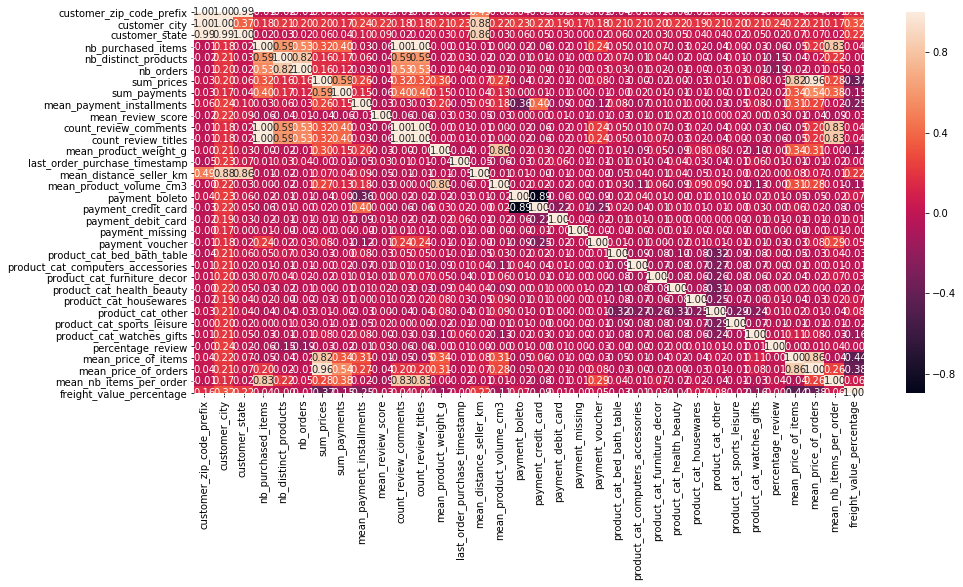

In [85]:
correlations_matrix = functions_p5.categorical_matrix(data_customers, return_results=True)

## **Identification** des sous-ensembles de variables fortement corrélées

In [86]:
list_of_correlated_subsets = functions_p5.find_colinear_features(correlations_matrix, threshold=0.9)

Subset(s) of correlated features above threshold 0.9:
{'customer_city', 'customer_state', 'customer_zip_code_prefix'}
{'customer_state', 'customer_zip_code_prefix'}
{'nb_purchased_items', 'count_review_comments', 'count_review_titles'}
{'sum_prices', 'mean_price_of_orders'}


## **Élimination** des variables fortement corrélées

In [87]:
# We remove highly correlated features
data_customers = data_customers.drop(columns=[
    'customer_zip_code_prefix',  # strongly correlated to 'customer_state'
    'customer_city',  # strongly correlated to 'customer_state'
    'nb_purchased_items',  # strongly correlated to 'count_review_comments'
    'count_review_titles',  # strongly correlated to 'count_review_comments'
    'sum_prices',  # strongly correlated to 'mean_price_of_orders'
])

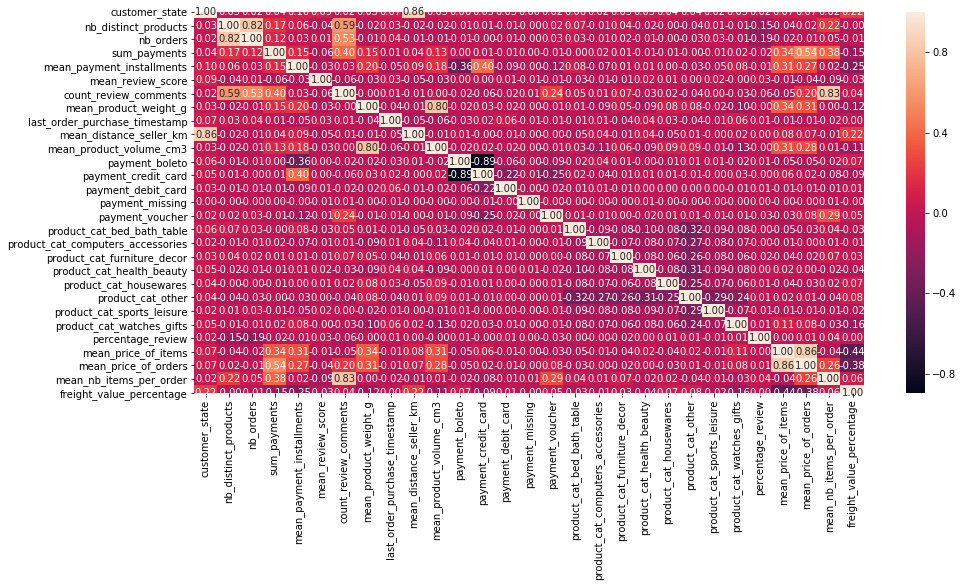

No found correlated features above threshold 0.9.


In [88]:
correlations_matrix = functions_p5.categorical_matrix(data_customers, return_results=True)
list_of_correlated_subsets = functions_p5.find_colinear_features(correlations_matrix, threshold=0.9)

# **Encodage**

## **Encodage "one-hot"** des variables catégorielles ('customer_state')
Les algorithmes de *clustering* n'acceptant en entrée que des données numériques, nous allons encoder numériquement les données qui ne sont pas numériques (données catégorielles).

In [91]:
# Setup parameters before calling the function
categorical_Series = data_customers['customer_state']
threshold = 0.03 # collapse all categories less than 3%
replacement = 'other' # replacement value

# Call the function to collapse categories and update the pd.DataFrame
data_customers['customer_state'] = functions_p5.collapse_categories_by_frequency(categorical_Series, threshold=0.05, replacement='other')

Number of categorical modalities before collapsing: 27
Number of categorical modalities after collapsing: 6


In [92]:
# One-hot-encoding the 'customer_state' variable
dummy_df = pd.get_dummies(data_customers['customer_state'], prefix='state')

# Concatenating the DataFrame and one-hot-encoded variables
data_customers = pd.concat([data_customers, dummy_df], axis=1)

# Dropping the original column
data_customers = data_customers.drop(columns=['customer_state'])

## **Encodage "fréquentiel"** des variables multi-catégorielles
Nous souhaitons encoder les variables catégorielles *'product_categories'* et *'payment_types'*, en conservant l'information sur la fréquence de chaque catégorie.

## **Encodage** des variables temporelles

In [93]:
# Converting 'timedelta' and 'datetime' features to float
data_customers = functions_p5.convert_timeseries_to_float(data_customers)

# Pré-traitement (centrage et réduction)

In [94]:
data_customers.select_dtypes(exclude='number').columns

Index([], dtype='object')

In [97]:
# Applying preprocessing (standardization)
data_customers_std = functions_p5.preprocessing(data_customers)
print("Shape of the DataFrame: {}".format(data_customers_std.shape))
data_customers_std.head()

Shape of the DataFrame: (99441, 36)


,nb_distinct_products,nb_orders,sum_payments,mean_payment_installments,mean_review_score,count_review_comments,mean_product_weight_g,last_order_purchase_timestamp,mean_distance_seller_km,mean_product_volume_cm3,payment_boleto,payment_credit_card,payment_debit_card,payment_missing,payment_voucher,product_cat_bed_bath_table,product_cat_computers_accessories,product_cat_furniture_decor,product_cat_health_beauty,product_cat_housewares,product_cat_other,product_cat_sports_leisure,product_cat_watches_gifts,activity_period,percentage_review,mean_period_between_orders,mean_price_of_items,mean_price_of_orders,mean_nb_items_per_order,freight_value_percentage,state_MG,state_PR,state_RJ,state_RS,state_SP,state_other
0,-0.238397,-0.199981,-0.115552,-0.341734,-0.052462,-0.296503,1.778032,-1.511924,-0.423915,3.990452,-0.500494,0.5778,-0.125864,-0.002724,-0.194504,-0.326295,-0.270016,-0.266299,-0.313981,-0.252997,1.022337,-0.292314,-0.246258,-0.156278,0.052338,-0.155216,-0.004202,-0.081436,-0.272636,-0.470367,-0.364017,-0.231182,-0.38526,-0.241173,1.175606,-0.543829
1,-0.238397,-0.199981,0.162119,1.897287,0.689677,-0.296503,2.174444,0.062313,-0.314055,1.658219,-0.500494,0.5778,-0.125864,-0.002724,-0.194504,-0.326295,-0.270016,-0.266299,-0.313981,4.062850,-1.000743,-0.292314,-0.246258,-0.156278,0.052338,-0.155216,0.859880,0.602275,-0.272636,-0.553557,-0.364017,-0.231182,-0.38526,-0.241173,1.175606,-0.543829
2,-0.238397,-0.199981,-0.099564,1.524117,0.689677,-0.296503,1.665621,0.889800,-0.962248,1.335657,-0.500494,0.5778,-0.125864,-0.002724,-0.194504,-0.326295,-0.270016,-0.266299,-0.313981,-0.252997,1.022337,-0.292314,-0.246258,-0.156278,0.052338,-0.155216,0.074561,-0.019114,-0.272636,-0.759068,-0.364017,-0.231182,-0.38526,-0.241173,1.175606,-0.543829
3,-0.238397,-0.199981,-0.076642,-0.714905,0.689677,-0.296503,2.717584,0.452576,-0.981476,2.811315,-0.500494,0.5778,-0.125864,-0.002724,-0.194504,-0.326295,-0.270016,-0.266299,-0.313981,-0.252997,1.022337,-0.292314,-0.246258,-0.156278,0.052338,-0.155216,0.127246,0.022573,-0.272636,-0.583495,-0.364017,-0.231182,-0.38526,-0.241173,1.175606,-0.543829
4,-0.238397,-0.199981,0.039588,1.897287,0.689677,-0.296503,0.836858,1.351417,-0.641271,0.365933,-0.500494,0.5778,-0.125864,-0.002724,-0.194504,-0.326295,-0.270016,-0.266299,-0.313981,-0.252997,1.022337,-0.292314,-0.246258,-0.156278,0.052338,-0.155216,0.549040,0.356321,-0.272636,-0.955177,-0.364017,-0.231182,-0.38526,-0.241173,1.175606,-0.543829


## Sauvegarde

In [98]:
# Save the file (text type)
data_customers_std.to_csv("data\p5_data_std.csv")

# **Réduction dimensionnelle** par ACP
Pour faciliter le traitement des données par les algorithmes de clustering et lutter contre "*la malédiction de la dimensionnalité*", nous procédons à une réduction dimensionnelle préalable.

## Eboulis des valeurs propres

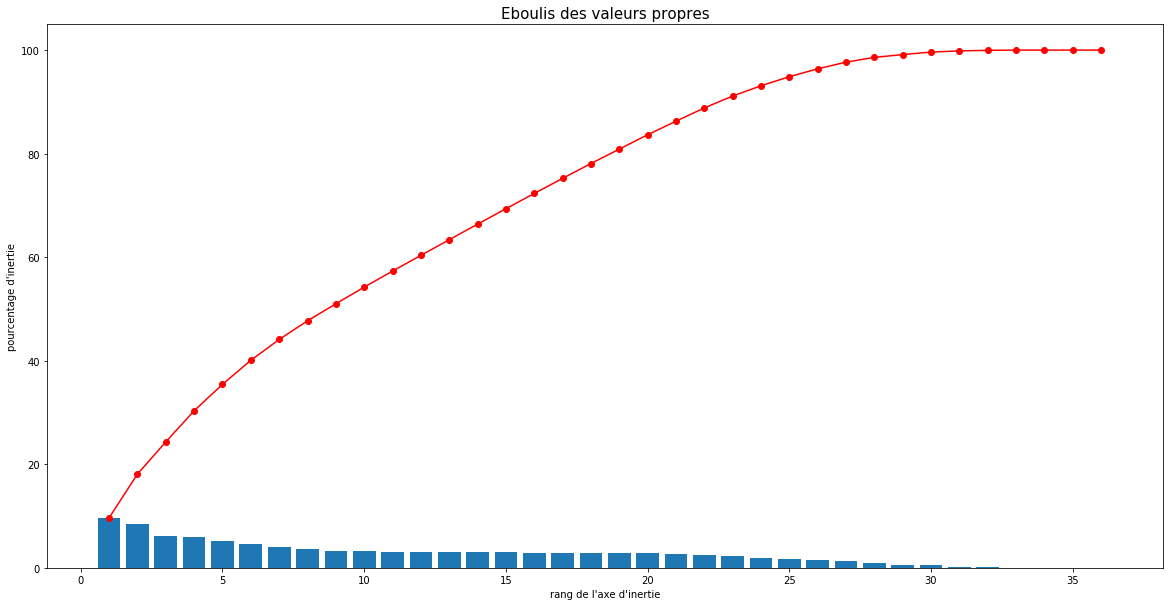

In [99]:
functions_p5.display_scree_plot(data_customers_std)

## Projection sur les axes d'inertie jusqu'à 90% de variance

In [100]:
data_PCA = functions_p5.PCA_features_reduction(data_customers_std, var_threshold=0.9)

Initial number of features: 36
Number of selected features: 23
Cumulative explained variance:  91.12%


In [101]:
col_names = [ "PCA_F{}".format(i) for i in range(1, data_PCA.shape[1]+1)]
data_PCA = pd.DataFrame(data_PCA, columns=col_names)

In [103]:
data_PCA.head(2)

,PCA_F1,PCA_F2,PCA_F3,PCA_F4,PCA_F5,PCA_F6,PCA_F7,PCA_F8,PCA_F9,PCA_F10,PCA_F11,PCA_F12,PCA_F13,PCA_F14,PCA_F15,PCA_F16,PCA_F17,PCA_F18,PCA_F19,PCA_F20,PCA_F21,PCA_F22,PCA_F23
0,0.019404,2.224307,-1.131549,0.969006,-1.997360,2.469327,-0.428762,-1.019771,-0.499067,-0.009706,-0.087167,0.018542,-0.188092,0.022906,0.160512,0.628954,0.017722,0.125261,0.319583,-0.423667,-0.080351,-0.620725,-1.649709
1,0.575380,2.799850,-1.785003,0.429419,-0.723785,0.886443,-2.314225,-1.481173,1.660471,-0.147778,-0.089337,-0.598532,0.285437,-1.170239,-1.010104,-0.898702,-0.950753,1.790117,0.148628,0.136725,0.775437,-0.921361,0.523037


## Sauvegarde

In [104]:
# Save the file (text type)
data_PCA.to_csv("data\p5_data_PCA.csv")

# **Ségmentation RFM**
Nous n'allons conserver que les variables pour la ségmentation *RFM* (Récence, Fréquence, Montant).

In [105]:
# Defining the features for RFM clustering
data_RFM = pd.DataFrame()
data_RFM['Recency'] = data_customers['last_order_purchase_timestamp']
data_RFM['Frequency'] = data_customers['nb_orders']
data_RFM['Monetary '] = data_customers['mean_price_of_orders']

In [107]:
# Applying preprocessing (standardization)
data_RFM = functions_p5.preprocessing(data_RFM)

In [108]:
data_RFM.head(3)

,Recency,Frequency,Monetary
0,-1.511924,-0.199981,-0.081436
1,0.062313,-0.199981,0.602275
2,0.889800,-0.199981,-0.019114


In [109]:
# Save the file (text type)
data_RFM.to_csv("data\p5_data_RFM.csv")

In [110]:
# feather does not support serializing a non-default index
data_RFM = data_RFM.reset_index()

# Drop the column with original index
data_RFM = data_RFM.drop(columns=["index"])

# Save binary file
data_RFM.to_feather("data\p5_data_RFM.ft")

In [111]:
data_RFM.head()

,Recency,Frequency,Monetary
0,-1.511924,-0.199981,-0.081436
1,0.062313,-0.199981,0.602275
2,0.889800,-0.199981,-0.019114
3,0.452576,-0.199981,0.022573
4,1.351417,-0.199981,0.356321


# TO-DO LIST

* Inspecter sur l'origine des valeurs manquantes et dupliquées
    * Vérifier l'intégrité de chacune des tables
    * Vérifier l'intégrité après les jointures